---
title: "Validation basic for modeling"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-03-22"
categories: [python, datacamp, machine learning, models]
image: "validationBasic.png"

---

# Validation Basics

In this section, we will focus on the basics of model validation. To build the foundation for the techniques of K-Fold and Leave-One-Out validation practiced in chapter three, we split the data into training, validation, and testing datasets, as well as develop an understanding of the bias-variance tradeoff.

This **Validation Basics** is part of [Datacamp course: Model Validation in Python] which describe about model validation as t has never been easier to implement machine learning models than it is today. The results of running new data through a model may not be as accurate as expected without proper validation. Validation of models allows analysts to answer confidently the question, "How good is your model?". This question will be addressed for classification models using the complete set of tic-tac-toe endgame scenarios, and for regression models using fivethirtyeight's ultimate Halloween candy power ranking dataset. The purpose of this course is to introduce the basics of model validation, to discuss various validation techniques, and to begin to develop tools for creating high-performance and validated models.

This is my learning experience of data science through DataCamp. These repository contributions are part of my learning journey through my graduate program masters of applied data sciences (MADS) at University Of Michigan, [DeepLearning.AI], [Coursera] & [DataCamp]. You can find my similar articles & more stories at my [medium] & [LinkedIn] profile. I am available at [kaggle] & [github blogs] & [github repos]. Thank you for your motivation, support & valuable feedback.

These include projects, coursework & notebook which I learned through my data science journey. They are created for reproducible & future reference purpose only. All source code, slides or screenshot are intellactual property of respective content authors. If you find these contents beneficial, kindly consider learning subscription from [DeepLearning.AI Subscription], [Coursera], [DataCamp]



[DeepLearning.AI]: https://www.deeplearning.ai
[DeepLearning.AI Subscription]: https://www.deeplearning.ai
[Coursera]: https://www.coursera.org
[DataCamp]: https://www.datacamp.com
[medium]: https://medium.com/@kamig4u
[LinkedIn]: https://www.linkedin.com/in/asadenterprisearchitect
[kaggle]: https://www.kaggle.com/kakamana
[github blogs]: https://kakamana.github.io
[github repos]: https://github.com/kakamana
[Datacamp course: Model Validation in Python]: (https://app.datacamp.com/learn/courses/model-validation-in-python)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (8, 8)

# Creating train,test, and validation datasets

    Traditional train/test split
        Seen data (used for training)
        Unseen data (unavailable for training)

![](validation-1.png)

## Create one holdout set

In [3]:
tic_tac_toe = pd.read_csv('dataset/tic-tac-toe.csv')
tic_tac_toe.head()

,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [4]:
# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])
y = tic_tac_toe.iloc[:, 9]

# Create training and testing datasets, Use 10% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1111)

## Create two holdout sets

Before you start testing different models and parameter sets, you will need to split the data into training, validation, and testing datasets. Remember that after splitting the data into training and testing datasets, the validation dataset is created by splitting the training dataset.

In [5]:
# Create temporary training and final testing datasets
X_temp, X_test, y_temp, y_test  =\
    train_test_split(X, y, test_size=0.2, random_state=1111)

# Create the final training and validation datasets
X_train, X_val, y_train, y_val =\
    train_test_split(X_temp, y_temp, test_size=0.25, random_state=1111)

# Accuracy metrics: regression models

![](validation-2.png)

## Mean absolute error


In [8]:
y_test = np.array([53, 51, 51, 49, 43, 42, 42, 41, 41, 37, 36, 31, 29, 28, 20, 67, 61,
       55, 51, 51, 47, 43, 41, 40, 34, 33, 32, 31, 26, 24])

predictions = np.array([60, 62, 42, 42, 30, 50, 52, 42, 44, 35, 30, 30, 35, 40, 15, 72, 58,
       60, 40, 42, 45, 46, 40, 35, 25, 40, 20, 34, 25, 24])

In [9]:
from sklearn.metrics import mean_absolute_error

# Manually calculate the MAE
n = len(predictions)
mae_one = sum(abs(y_test - predictions)) / n
print('With a manual calculation, the error is {}'.format(mae_one))

# Use scikit-learn to calculate the MAE
mae_two = mean_absolute_error(y_test, predictions)
print('Using scikit-learn, the error is {}'.format(mae_two))

With a manual calculation, the error is 5.9
Using scikit-learn, the error is 5.9


## Mean squared error

In [10]:
from sklearn.metrics import mean_squared_error

n = len(predictions)
# Finish the manual calculation of the MSE
mse_one = sum((y_test - predictions) ** 2) / n
print('With a manual calculation, the error is {}'.format(mse_one))

# Use the scikit-learn function to calculate MSE
mse_two = mean_squared_error(y_test, predictions)
print('Using scikit-learn, the error is {}'.format(mse_two))

With a manual calculation, the error is 49.1
Using scikit-learn, the error is 49.1


## Performance on data subsets

In [11]:
labels= np.array(['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'W', 'W'])

In [12]:
from sklearn.metrics import mean_absolute_error as mae

# Find the East conference teams
east_teams = labels == 'E'

# Create arrays for the true and predicted values
true_east = y_test[east_teams]
preds_east = predictions[east_teams]

west_teams = labels == 'W'
true_west = y_test[west_teams]
preds_west = predictions[west_teams]

# Print the accuracy metrics
print('The MAE for East teams is {}'.format(mae(true_east, preds_east)))

# Print the west accuracy
print('The MAE for West teams is {}'.format(mae(true_west, preds_west)))

The MAE for East teams is 6.733333333333333
The MAE for West teams is 5.066666666666666


# Classification metrics


    Types:
        Precision
        Recall (also called sensitivity)
        Accuracy
        Specificity
        F1-score and its variations
    Confusion Matrix
        True Positive: Predict/Actual are both 1
        True Negative: Predict/Actual are both 0
        False Positive: Predicted 1, actual 0
        False Negative: Predicted 0, actual 1


## Confusion matrices

Confusion matrices are a great way to start exploring your model's accuracy. They provide the values needed to calculate a wide range of metrics, including sensitivity, specificity, and the F1-score.



In [13]:
# Calculate and print the accuracy
accuracy = (324 + 491) / (953)
print("The overall accuracy is {0: 0.2f}".format(accuracy))

# Calculate and print the precision
precision = (491) / (491 + 15)
print("The precision is {0: 0.2f}".format(precision))

# Calculate and print the recall
recall = (491) / (491 + 123)
print("The recall is {0: 0.2f}".format(recall))

The overall accuracy is  0.86
The precision is  0.97
The recall is  0.80


## Confusion matrices, again

Creating a confusion matrix in Python is simple. The biggest challenge will be making sure you understand the orientation of the matrix. This exercise makes sure you understand the sklearn implementation of confusion matrices.

In [14]:
tic_tac_toe = pd.read_csv('dataset/tic-tac-toe.csv')

In [15]:
# Create dummy variables using pandas
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])
y = tic_tac_toe.iloc[:, 9]
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)

# Create training and testing datasets, Use 10% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1111)

In [16]:
rfc = RandomForestClassifier(n_estimators=500, random_state=1111)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1111)

In [19]:
from sklearn.metrics import confusion_matrix

# Create predictions
test_predictions = rfc.predict(X_test)

# Create and print the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
print(cm)

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is: {}".format(cm[1, 1]))
print("\nRow 1, column 1 represents the number of actual 1s that were predicted 1s (the true positives). Always make sure you understand the orientation of the confusion matrix before you start using it!")

[[28  2]
 [ 0 66]]
The number of true positives is: 66

Row 1, column 1 represents the number of actual 1s that were predicted 1s (the true positives). Always make sure you understand the orientation of the confusion matrix before you start using it!


## Precision vs. recall

The accuracy metrics you use to evaluate your model should always be based on the specific application. For this example, let's assume you are a really sore loser when it comes to playing Tic-Tac-Toe, but only when you are certain that you are going to win.

Choose the most appropriate accuracy metric, either precision or recall, to complete this example. But remember, if you think you are going to win, you better win!

In [20]:
from sklearn.metrics import precision_score, recall_score

test_predictions = rfc.predict(X_test)

# Create precision score based on the metric
p_score = precision_score(y_test, test_predictions)
r_score = recall_score(y_test, test_predictions)

# Print the final result
print('The precision value is {0:.2f}, The recall value is {1:.2f}'.format(p_score, r_score))

The precision value is 0.97, The recall value is 1.00


# The bias-variance tradeoff


    Variance
        Following the training data too closely
        Fails to generalize to the test data
        Low training error but high test error
        Occurs when models are overfit and have high complexity
        High variance makes over-fitting
    Bias
        Failing to find the relationship between the data and the response
        High training/test error
        Occurs when models are underfit
        High bias makes under-fitting


## Error due to under/over-fitting

The candy dataset is prime for overfitting. With only 85 observations, if you use 20% for the testing dataset, you are losing a lot of vital data that could be used for modeling. Imagine the scenario where most of the chocolate candies ended up in the training data and very few in the holdout sample. Our model might only see that chocolate is a vital factor, but fail to find that other attributes are also important. In this exercise, you'll explore how using too many features (columns) in a random forest model can lead to overfitting.

In [21]:
candy = pd.read_csv('dataset/candy-data.csv')

X = candy.drop(['competitorname', 'winpercent'], axis=1)
y = candy['winpercent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25, random_state=1111, max_features=2)

rfr.fit(X_train, y_train)

# Print the training and test accuracy
print('The training error is {0:.2f}'.format(mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mae(y_test, rfr.predict(X_test))))

The training error is 3.90
The testing error is 9.15


In [23]:
# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_features=11)
rfr.fit(X_train, y_train)

# Print the training and testing accuracies
print('The training error is {0:.2f}'.format(
  mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(
  mae(y_test, rfr.predict(X_test))))

The training error is 3.59
The testing error is 10.00


In [24]:
# Update the rfr model
rfr = RandomForestRegressor(n_estimators=25,
                            random_state=1111,
                            max_features=4)
rfr.fit(X_train, y_train)

# Print the training and testing accuracies
print('The training error is {0:.2f}'.format(
  mae(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(
  mae(y_test, rfr.predict(X_test))))

The training error is 3.60
The testing error is 8.79


## Am I underfitting?

In [25]:
X = pd.get_dummies(tic_tac_toe.iloc[:, 0:9])
y = tic_tac_toe.iloc[:, 9]
y = tic_tac_toe['Class'].apply(lambda x: 1 if x == 'positive' else 0)

# Create training and testing datasets, Use 10% for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

In [27]:
from sklearn.metrics import accuracy_score

test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50]:
    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train)
    # Create predictions for the X_train and X_test datasets.
    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)
    # Append the accuracy score for the test and train predictions.
    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))
# Print the train and test scores.
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))
print("\nNotice that with only one tree, both the train and test scores are low. As you add more trees, both errors improve. Even at 50 trees, this still might not be enough. Every time you use more trees, you achieve higher accuracy. At some point though, more trees increase training time, but do not decrease testing error.")

The training scores were: [0.94, 0.93, 0.98, 0.97, 0.99, 1.0, 1.0, 1.0]
The testing scores were: [0.83, 0.79, 0.89, 0.91, 0.91, 0.93, 0.97, 0.98]

Notice that with only one tree, both the train and test scores are low. As you add more trees, both errors improve. Even at 50 trees, this still might not be enough. Every time you use more trees, you achieve higher accuracy. At some point though, more trees increase training time, but do not decrease testing error.


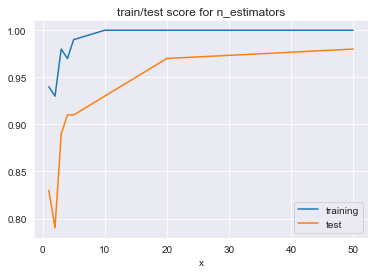

In [28]:
x = [1, 2, 3, 4, 5, 10, 20, 50]
tmp = pd.DataFrame({'x':x, 'training':train_scores, 'test':test_scores})
tmp.set_index('x', inplace=True)
tmp.plot(title='train/test score for n_estimators');